In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [4]:
df = pd.read_excel('source/Employee by Education.xlsx', usecols=['Education', 'Date', 'Total HC'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head(10)

,Education,Date,Total HC,Year
0,Doctorate,2012-12-01,3,2012
1,Master,2012-12-01,138,2012
2,Bachelor,2012-12-01,4973,2012
3,Diploma,2012-12-01,1719,2012
4,SeniorHS,2012-12-01,1764,2012
5,JuniorHS,2012-12-01,61,2012
6,Elementary,2012-12-01,17,2012
7,Doctorate,2013-12-01,4,2013
8,Master,2013-12-01,158,2013
9,Bachelor,2013-12-01,5863,2013


In [5]:
current_year = 2019
dff = (df[df['Year'].eq(current_year)]
       .sort_values(by='Total HC', ascending=True))
dff

,Education,Date,Total HC,Year
49,Doctorate,2019-10-01,2,2019
55,Elementary,2019-10-01,3,2019
54,JuniorHS,2019-10-01,18,2019
50,Master,2019-10-01,281,2019
53,SeniorHS,2019-10-01,1007,2019
52,Diploma,2019-10-01,1626,2019
51,Bachelor,2019-10-01,8400,2019


<BarContainer object of 7 artists>

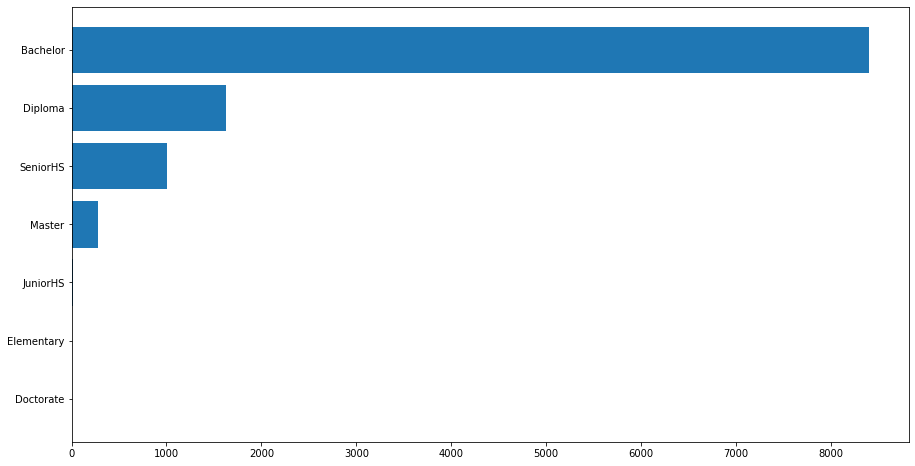

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Education'], dff['Total HC'])

In [7]:
colors = dict(zip(
    ['Doctorate', 'Master', 'Bachelor', 'Diploma',
     'SeniorHS', 'JuniorHS', 'Elementary'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))

Text(1, 0.4, '2019')

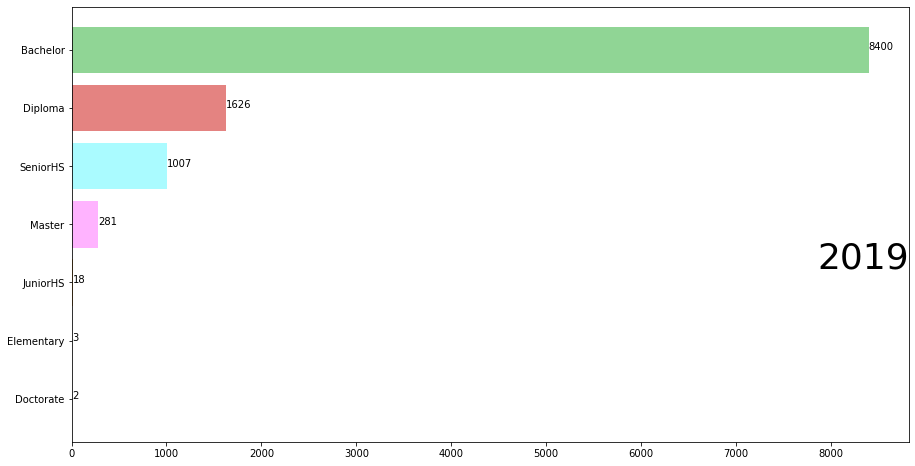

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['Education'], dff['Total HC'], color=[colors[x] for x in dff['Education']])
for i, (value, name) in enumerate(zip(dff['Total HC'], dff['Education'])):
    ax.text(value, i,     value,           ha='left')
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=36, ha='right')

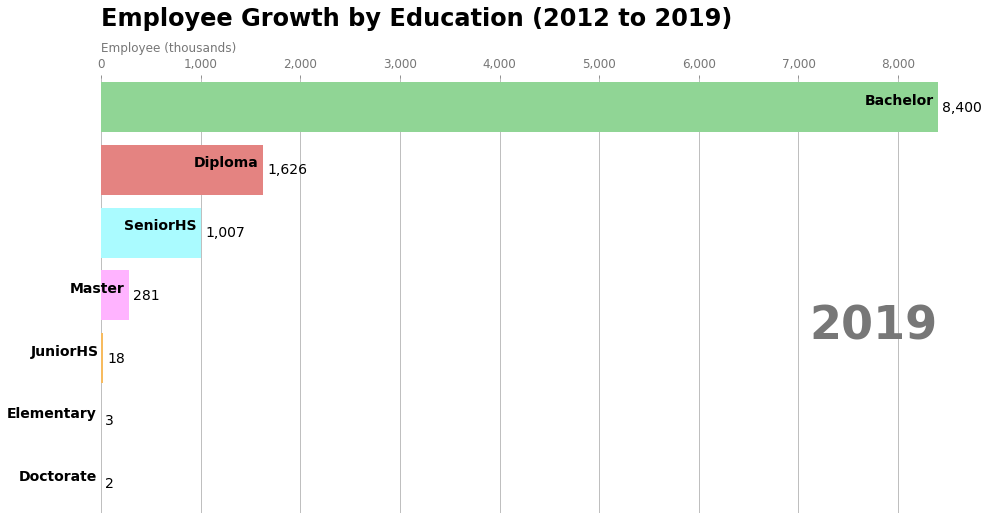

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Total HC', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Education'], dff['Total HC'], color=[colors[x] for x in dff['Education']])
    dx = dff['Total HC'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Total HC'], dff['Education'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Employee (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Employee Growth by Education (2012 to 2019)',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    
draw_barchart(2019)

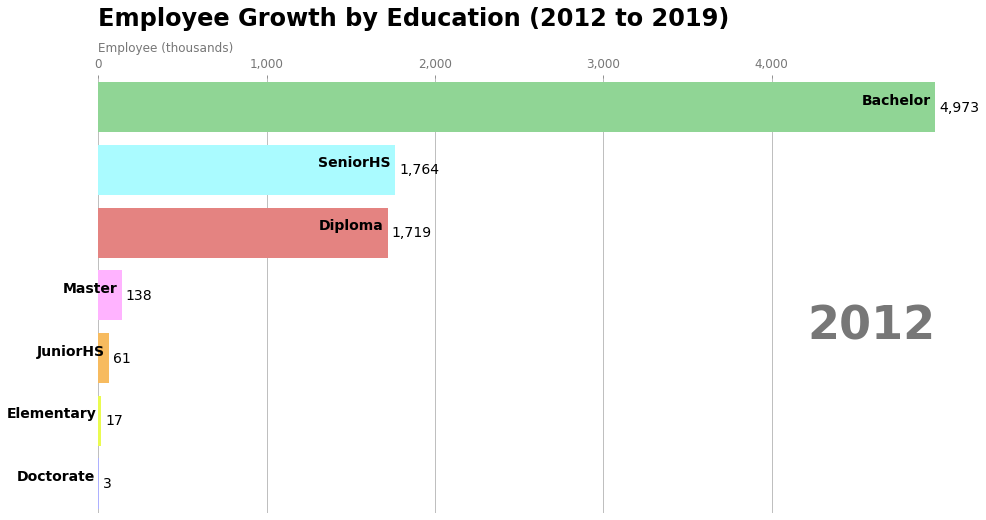

In [11]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2012, 2020))
HTML(animator.to_jshtml()) 